In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
d2=pd.read_csv('./dataset2.csv')
d2.head(2)

,day,WTI,Brent,Dubai
0,2003-01-02,32.03,30.31,26.88
1,2003-01-03,33.22,31.74,27.56


In [3]:
d2.day=d2.day.astype('datetime64[ns]')
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     5106 non-null   datetime64[ns]
 1   WTI     5106 non-null   float64       
 2   Brent   5106 non-null   float64       
 3   Dubai   5106 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 159.7 KB


In [4]:
future_real=pd.read_csv('./2023data - 시트1.csv')
future_real.head()

,ds,WTI,Brent,Dubai
0,2023-01-03,76.93,82.10,82.07
1,2023-01-04,72.84,77.84,77.10
2,2023-01-05,73.67,78.69,75.19
3,2023-01-06,73.77,78.57,75.20
4,2023-01-09,74.63,79.65,77.09


In [5]:
future_real.columns=d2.columns

future_real.day=future_real.day.astype('datetime64[ns]')
future_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     41 non-null     datetime64[ns]
 1   WTI     41 non-null     float64       
 2   Brent   41 non-null     float64       
 3   Dubai   41 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.4 KB


---

In [101]:
# 1. 정상성 확인
from statsmodels.tsa.stattools import adfuller

for i in d2.columns[1:]:
    print(adfuller(d2[i]))
    print('\n')    

#p-value= 0.06 귀무가설 채택 가능성 높음 > 안정성 뛰고 있지 않음 

(-2.769162427716939, 0.06281549669150059, 25, 5080, {'1%': -3.4316379148442406, '5%': -2.8621091210661658, '10%': -2.567072943494637}, 19424.810745381103)


(-2.6204449204732914, 0.08884490918753835, 29, 5076, {'1%': -3.431638930263491, '5%': -2.862109569675996, '10%': -2.567073182306638}, 19201.182669797457)


(-2.441186686230518, 0.13044749843189146, 16, 5089, {'1%': -3.4316356359901925, '5%': -2.862108114273264, '10%': -2.5670724075407443}, 17918.63394095384)




In [102]:
#2.ACF, PACF확인
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
#자기상관관계 : 현재의 상태가 과거&미래와 밀접한 관련이 있는 경우 -> 시간의 흐름에 따라 독립적이지 않음
#자기상관함수 acf : 시간에 따른 상관 정도를 나타냄

#부분자기상관계수 : 시간의 효과(추세,trend)를 제거한 상관계수
#   ex) 신발판매량 - 범죄발생건수 상관계수 p=1 일 때, 시간경과>인구 증가>신발판매증가>범죄증가
#       즉, 시간의 효과를 제거해야함



c:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



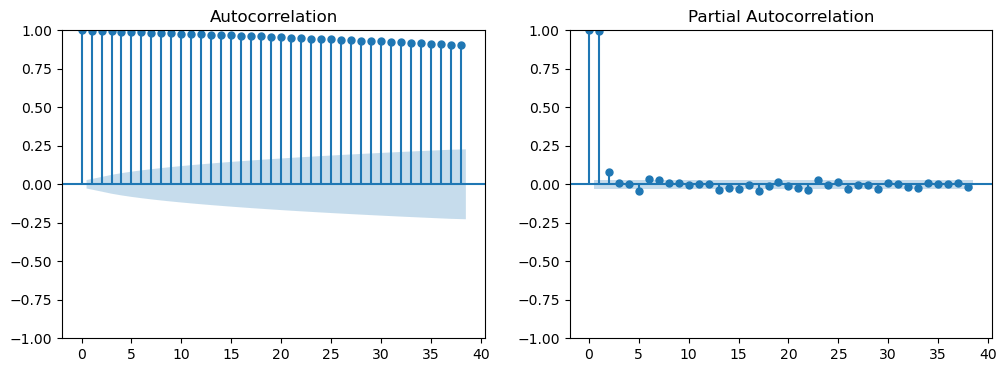

In [103]:
# 시각화 WTI
# subplot생성
fig, ax = plt.subplots(1,2 , figsize = (12,4))

# acf plot #자기상관성(자기상관함수) : 모두 양수
plot_acf(d2['WTI'], ax = ax[0])

# pacf plot  부분자기상관성(부분자기상관계수)
plot_pacf(d2['WTI'], ax= ax[1])
plt.show()

In [ ]:
acf : 매우 천천히 correlation이 내려가고 신뢰구간 안에 들어가지도 못함 > 안정적이지 않음
PACF : 시차 차이가 1인 것까지 correlation이 높은것을 볼 수 있음  > p=1


- 차분이란, 현시점 데이터에서 d시점 이전에 데이터를 뺀것으로서 정상성을 만족하지 않을때 만족하게 바꾸기 위한 방법중 하나.
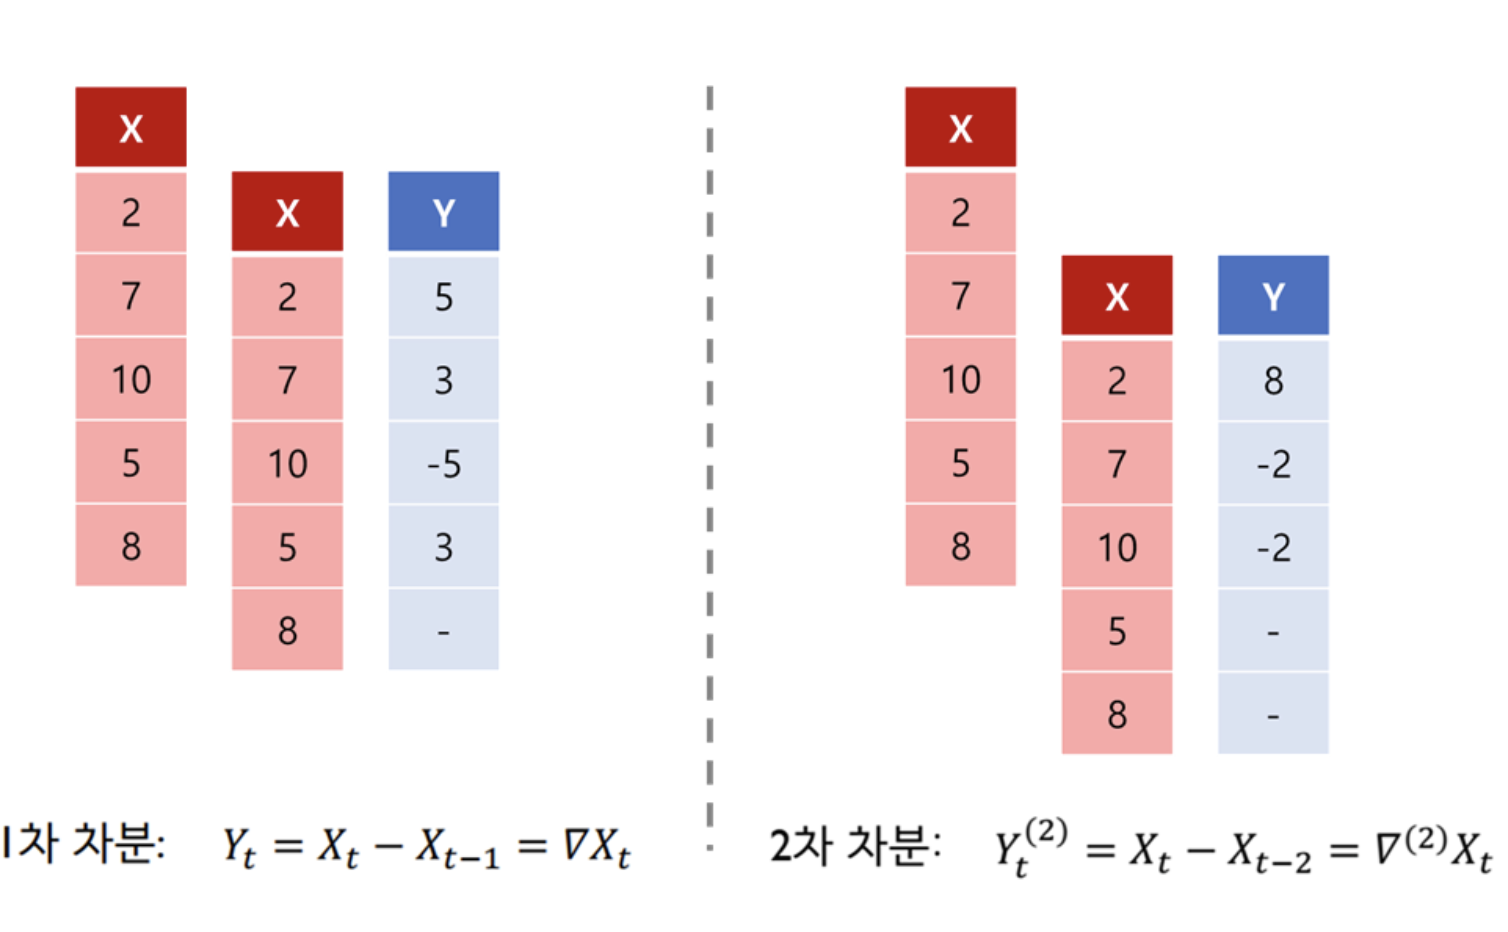

---
wti

c:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



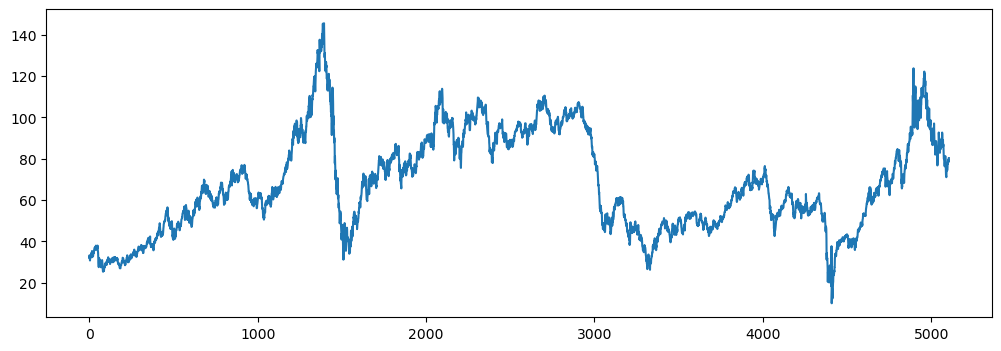

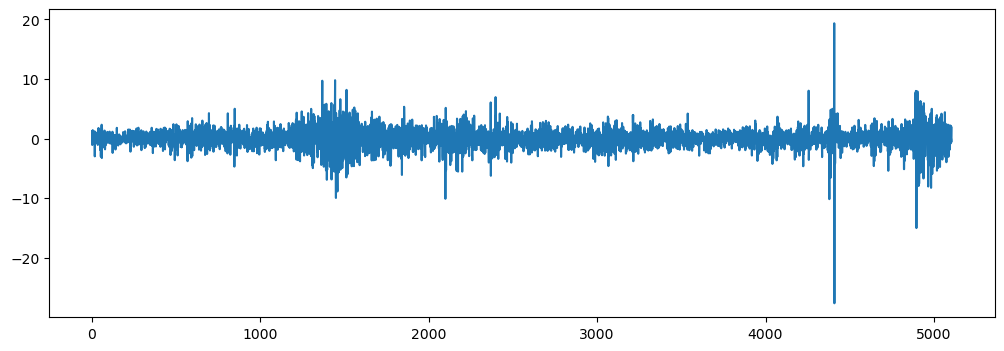

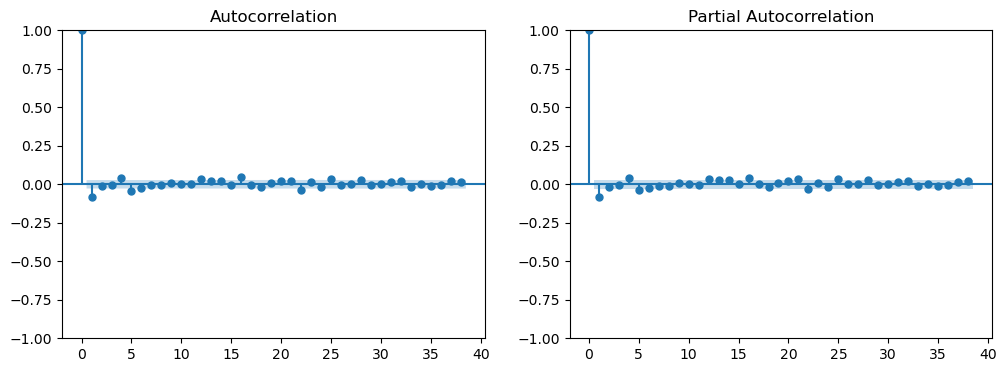

In [104]:
#1차 차분 wti
plt.figure(figsize=(12.2,4))
plt.plot(d2.WTI)

diff_1=d2['WTI'].diff(periods=1).iloc[1:]
plt.figure(figsize=(12.2,4))
diff_1.plot()

fig, ax = plt.subplots(1,2 , figsize = (12,4))
plot_acf(diff_1, ax = ax[0])
plot_pacf(diff_1, ax= ax[1])

plt.show()

In [23]:
# 1차 차분 결과 평균이 비교적 일정하게 보임, 1차 차분이 적절하다 판단 d=1

c:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



<Figure size 1220x400 with 0 Axes>

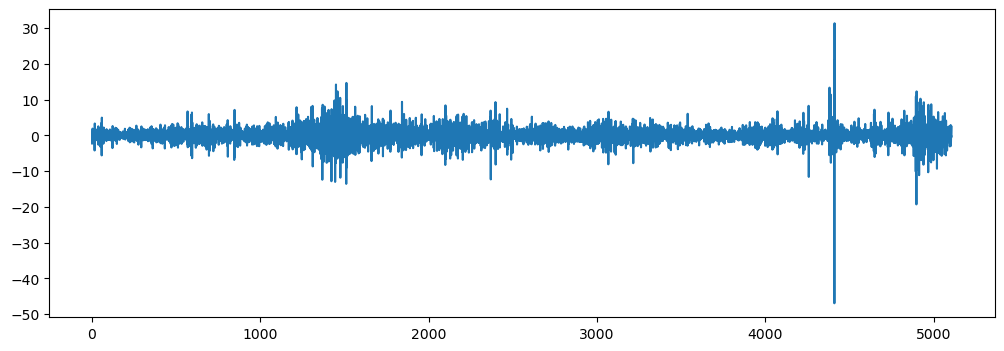

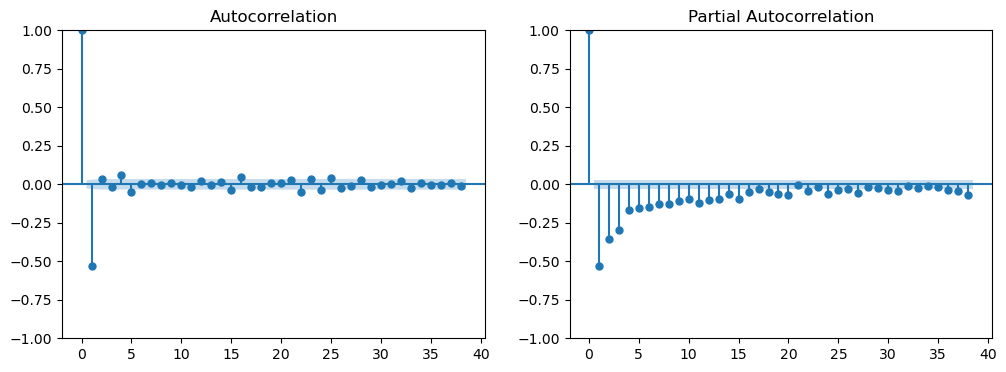

In [64]:
#2차 차분 wti
plt.figure(figsize=(12.2,4))


diff_2=diff_1.diff(periods=1).iloc[1:]
plt.figure(figsize=(12.2,4))
diff_2.plot()

fig, ax = plt.subplots(1,2 , figsize = (12,4))
plot_acf(diff_2, ax = ax[0])
plot_pacf(diff_2, ax= ax[1])

plt.show()

In [105]:
model_wti = pm.auto_arima(y = d2['WTI']        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )


# auto_arima에 주요한 옵션들을 설명하면 다음과 같습니다. 더 자세한 설명은 공식 가이드를 참조바랍니다.

# y: array 형태의 시계열 자료
# d (기본값 = none): 차분의 차수, 이를 지정하지 않으면 실행 기간이 매우 길어질 수 있음
# start_p (기본값 = 2), max_p (기본값 = 5): AR(p)를 찾을 범위 (start_p에서 max_p까지 찾는다!)
# start_q (기본값 = 2), max_q (기본값 = 5): AR(q)를 찾을 범위 (start_q에서 max_q까지 찾는다!)
# m (기본값 = 1): 계절적 차분이 필요할 때 쓸 수 있는 모수로 m=4
# 이면 분기별, m=12
# 면 월별, m=1
# 이면 계절적 특징을 띠지 않는 데이터를 의미한다. m=1이면 자동적으로 seasonal 에 대한 옵션은 False로 지정된다.
# seasonal (기본값 = True): 계절성 ARIMA 모형을 적합할지의 여부
# stepwise (기본값 = True): 최적의 모수를 찾기 위해 쓰는 힌드만 - 칸다카르 알고리즘을 사용할지의 여부, False면 모든 모수 조합으로 모형을 적합한다.
# trace (기본값 = False): stepwise로 모델을 적합할 때마다 결과를 프린트하고 싶을 때 사용한다.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19583.647, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19552.670, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19551.909, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19581.815, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19553.648, Time=1.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=19553.619, Time=0.65 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19554.175, Time=1.83 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=19550.108, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=19551.850, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=19551.820, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=19550.866, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=19552.372, Time=0.85 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 6.082 seconds


In [65]:
model_wti2 = pm.auto_arima(y = d2['WTI']        # 데이터
                      , d = 2            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )


# auto_arima에 주요한 옵션들을 설명하면 다음과 같습니다. 더 자세한 설명은 공식 가이드를 참조바랍니다.

# y: array 형태의 시계열 자료
# d (기본값 = none): 차분의 차수, 이를 지정하지 않으면 실행 기간이 매우 길어질 수 있음
# start_p (기본값 = 2), max_p (기본값 = 5): AR(p)를 찾을 범위 (start_p에서 max_p까지 찾는다!)
# start_q (기본값 = 2), max_q (기본값 = 5): AR(q)를 찾을 범위 (start_q에서 max_q까지 찾는다!)
# m (기본값 = 1): 계절적 차분이 필요할 때 쓸 수 있는 모수로 m=4
# 이면 분기별, m=12
# 면 월별, m=1
# 이면 계절적 특징을 띠지 않는 데이터를 의미한다. m=1이면 자동적으로 seasonal 에 대한 옵션은 False로 지정된다.
# seasonal (기본값 = True): 계절성 ARIMA 모형을 적합할지의 여부
# stepwise (기본값 = True): 최적의 모수를 찾기 위해 쓰는 힌드만 - 칸다카르 알고리즘을 사용할지의 여부, False면 모든 모수 조합으로 모형을 적합한다.
# trace (기본값 = False): stepwise로 모델을 적합할 때마다 결과를 프린트하고 싶을 때 사용한다.

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=23511.737, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=21805.340, Time=0.27 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.90 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=23509.737, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=21123.034, Time=0.36 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=20662.504, Time=0.60 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.99 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.66 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=20660.504, Time=0.32 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=21121.034, Time=0.18 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=2.67 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=3.45 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 22.604 seconds


In [ ]:
ARIMA(0,1,1)(0,0,0)[0] #AIC가 낮은 1차 차분값들로 설정

In [120]:
print(model_wti.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5147
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -9848.597
Date:                Wed, 19 Apr 2023   AIC                          19701.193
Time:                        10:26:10   BIC                          19714.285
Sample:                             0   HQIC                         19705.775
                               - 5147                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0807      0.006    -13.417      0.000      -0.093      -0.069
sigma2         2.6907      0.020    131.374      0.000       2.651       2.731
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [ ]:
# Ljung-Box (Q) / Heteroskedasticity (H) / Jarque-Bera (JB)에 대한 부분은 모두 잔차에 대한 검정 통계량들입니다.
# Ljung-Box (Q) 융-박스 검정 통계량는 잔차가 백색잡음인지 검정한 통계량입니다.

# Prob (Q) 값을 보면 0.65이므로 유의수준 0.05에서 귀무가설을 기각하지 못합니다. Ljung-Box (Q) 통계량의 귀무가설은 “잔차(residual)가 백색잡음(white noise) 시계열을 따른다”이므로, 위 결과를 통해 시계열 모형이 잘 적합되었고 남은 잔차는 더이상 자기상관을 가지지 않는 백색 잡음임을 확인할 수 있습니다.

# Jarque-Bera (JB) 자크-베라 검정 통계량은 잔차가 정규성을 띠는지 검정한 통계량입니다.

# Prob(JB)값을 보면 0.00으로 유의 수준 0.05에서 귀무가설을 기각합니다. Jarque-Bera (JB) 통계량의 귀무가설은 “잔차가 정규성을 만족한다”이므로, 위 결과를 통해 “잔차가 정규성을 따르지 않음”을 확인할 수 있습니다.

# Heteroskedasticity (H) 이분산성 검정 통계량은 잔차가 이분산을 띠지 않는지 검정한 통계량입니다.

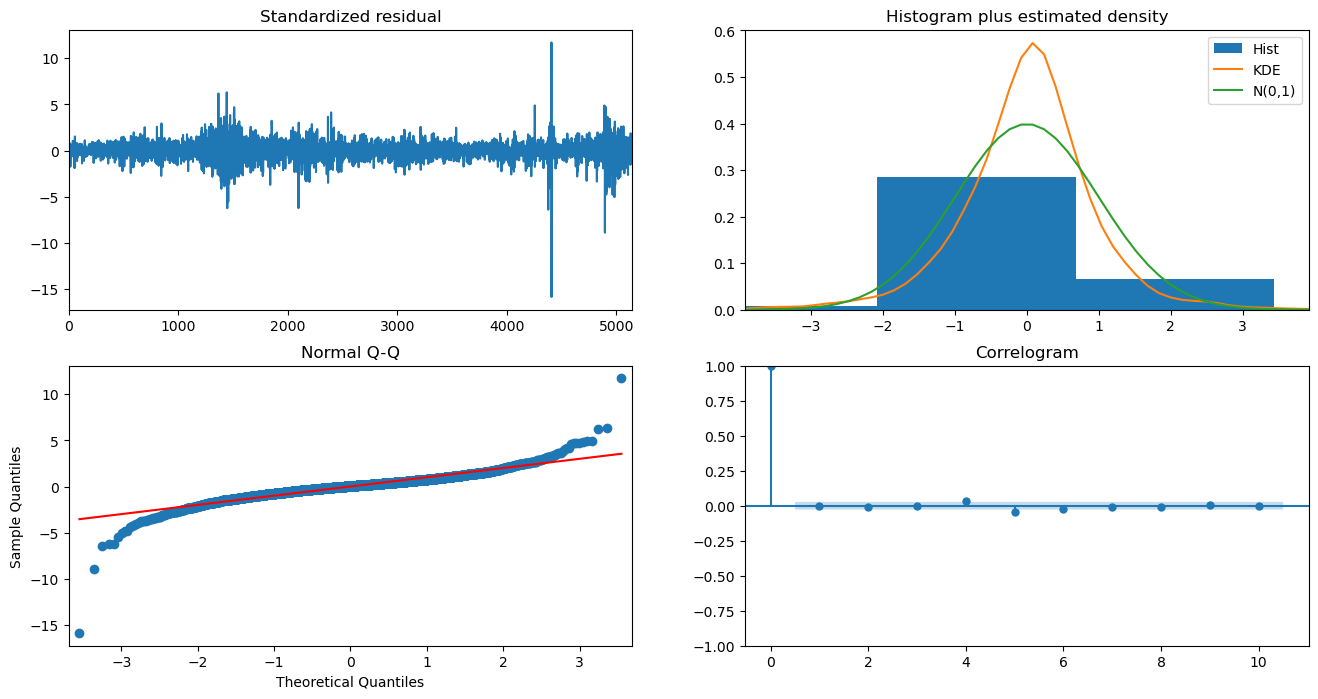

In [121]:
model_wti.plot_diagnostics(figsize=(16, 8))
plt.show()

In [122]:
def forecast_one_step():
    fc, conf_int = model_wti.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in future_real['WTI']:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model_wti.update(new_ob)

In [123]:
d3 = pd.concat([d2,future_real])
d3.head()

test=d3.iloc[5106:]
test.head(2)
pd.DataFrame({"test": future_real['WTI'], "pred": y_pred})

,test,pred
0,76.93,76.943020
1,72.84,76.931051
2,73.67,73.170385
3,73.77,73.629626
4,74.63,73.758643
5,75.12,74.559511
6,77.41,75.074683
7,78.39,77.221419
8,79.86,78.295909
9,80.02,79.734269


In [124]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = d2['WTI'].index, y = d2['WTI'], name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = test.index+5106, y = test['WTI'], name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = test.index+5106, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
])
    
#     # 신뢰 구간---------------------------------------------------------
#     , go.Scatter(x = test.index.tolist() + y_test.index[::-1].tolist() 
#                 ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
#                 ,fill='toself'
#                 ,fillcolor='rgba(0,0,30,0.1)'
#                 ,line=dict(color='rgba(0,0,0,0)')
#                 ,hoverinfo="skip"
#                 ,showlegend=False)
# ])

fig.update_layout(height=400, width=1000, title_text="국제 유가 변동 그래프 _ WTI _ ARIMA(0,1,1)모형")
fig.show()

In [125]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # # # 훈련 데이터-------------------------------------------------------
    # # go.Scatter(x = d2['WTI'].index, y = d2['WTI'], name = "Train", mode = 'lines'
    # #           ,line=dict(color = 'royalblue'))

    # 예측값-----------------------------------------------------------
    go.Scatter(x = test.day, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))

    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = test.day, y = test['WTI'], name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
])

fig.update_layout(height=400, width=1000, title_text="국제 유가 변동 그래프 _ WTI _ ARIMA(0,1,1)모형")
fig.show()

---
brent

c:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



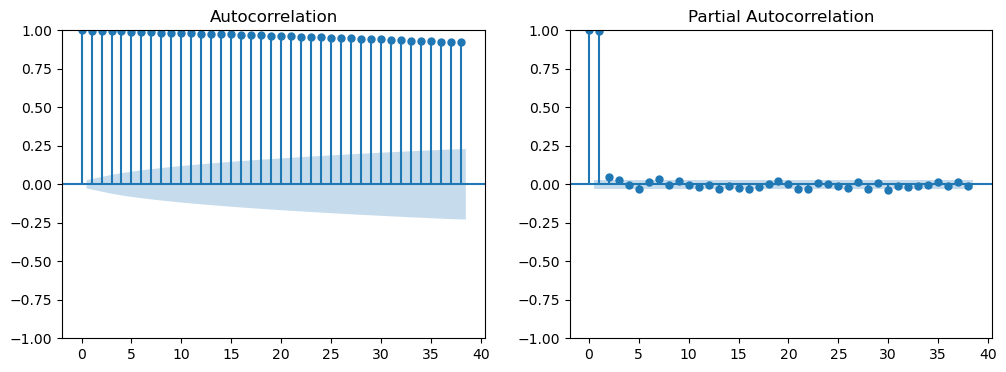

In [111]:
# 시각화 brent
# subplot생성
fig, ax = plt.subplots(1,2 , figsize = (12,4))

# acf plot #자기상관성(자기상관함수) : 모두 양수
plot_acf(d2['Brent'], ax = ax[0])

# pacf plot  부분자기상관성(부분자기상관계수)
plot_pacf(d2['Brent'], ax= ax[1])
plt.show()


# acf : 매우 천천히 correlation이 내려가고 신뢰구간 안에 들어가지도 못함 > 안정적이지 않음
# PACF : 시차 차이가 1인 것까지 correlation이 높은것을 볼 수 있음  > p=1


c:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



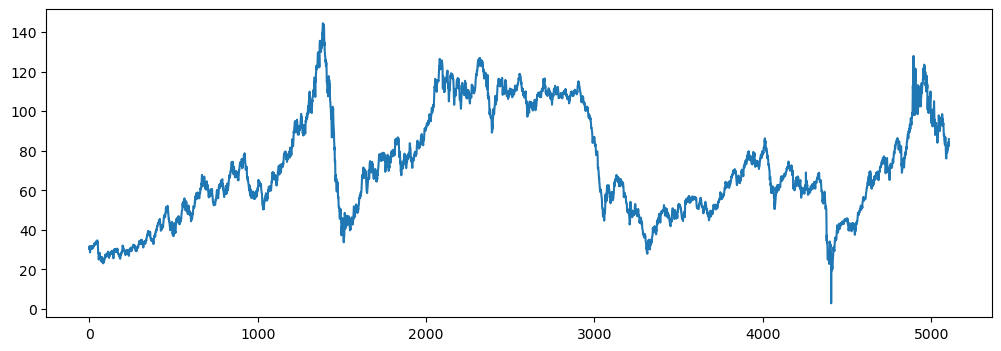

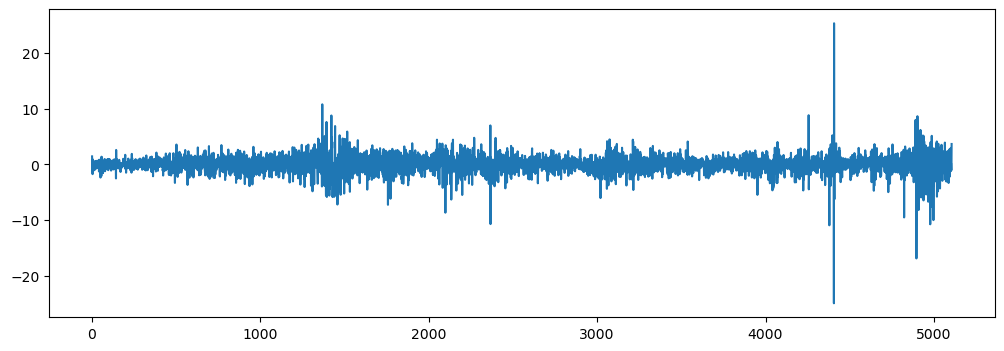

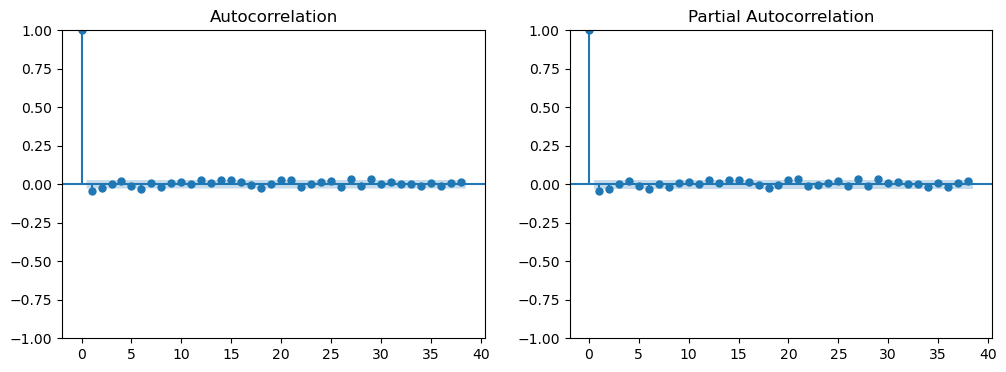

In [112]:
#1차 차분 brent
plt.figure(figsize=(12.2,4))
plt.plot(d2.Brent)

diff_1=d2['Brent'].diff(periods=1).iloc[1:]
plt.figure(figsize=(12.2,4))
diff_1.plot()

fig, ax = plt.subplots(1,2 , figsize = (12,4))
plot_acf(diff_1, ax = ax[0])
plot_pacf(diff_1, ax= ax[1])

plt.show()

In [126]:
import pmdarima as pm
model_brent = pm.auto_arima(y = d2['Brent']        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19318.268, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19310.405, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19309.837, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19316.504, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19309.647, Time=0.93 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19310.277, Time=1.44 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19310.469, Time=1.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=19308.532, Time=0.43 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=19310.360, Time=0.59 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=19312.135, Time=2.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=19306.801, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=19308.094, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=19308.738, Time=0.63 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=19308.627, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0

In [127]:
print(model_brent.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5106
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -9650.401
Date:                Wed, 19 Apr 2023   AIC                          19306.801
Time:                        10:28:03   BIC                          19326.415
Sample:                             0   HQIC                         19313.669
                               - 5106                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0449      0.005     -9.745      0.000      -0.054      -0.036
ma.L2         -0.0250      0.008     -2.975      0.003      -0.041      -0.009
sigma2         2.5674      0.015    166.946      0.0

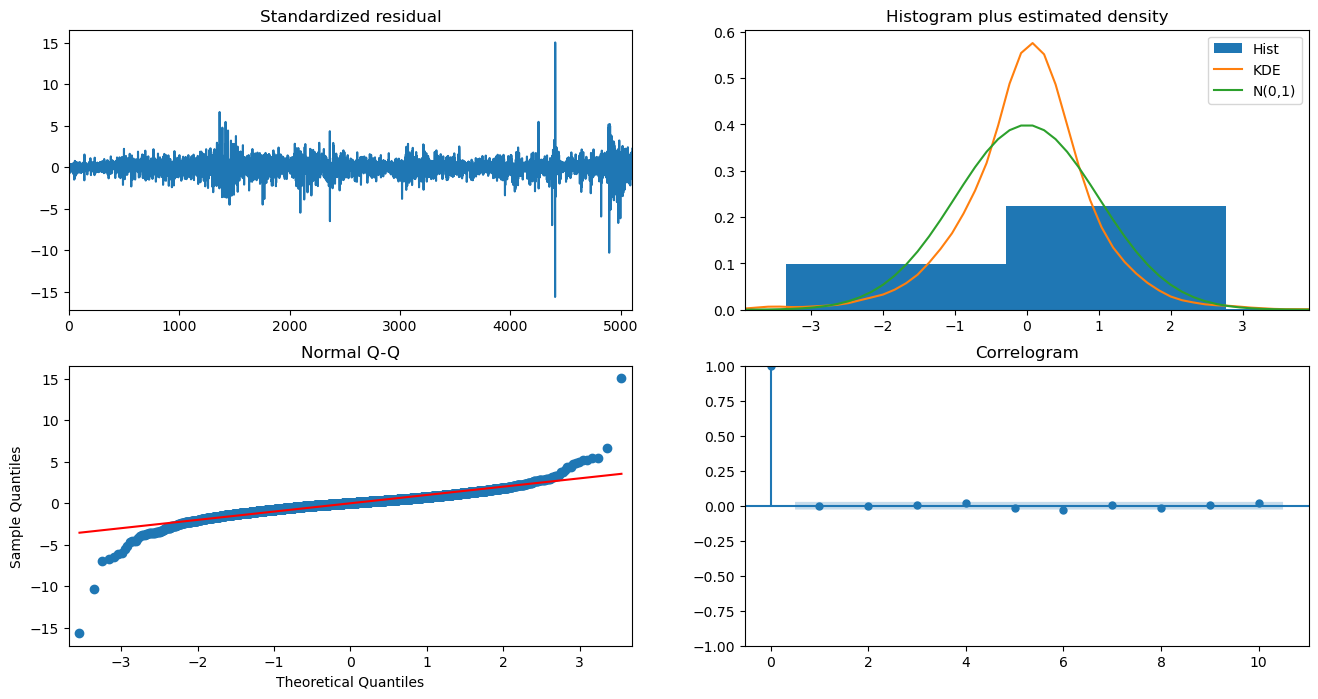

In [128]:
model_brent.plot_diagnostics(figsize=(16, 8))
plt.show()

In [129]:
def forecast_one_step():
    fc, conf_int = model_brent.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in future_real['Brent']:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model_brent.update(new_ob)

In [130]:
d3 = pd.concat([d2,future_real])
d3.head()

test=d3.iloc[5106:]
test.head(2)
pd.DataFrame({"test": future_real['Brent'], "pred": y_pred})

,test,pred
0,82.10,85.775313
1,77.84,82.180503
2,78.69,78.128442
3,78.57,78.777287
4,79.65,78.564779
5,80.10,79.606633
6,82.67,80.049799
7,84.03,82.540091
8,85.28,83.896660
9,84.46,85.181000


In [131]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = d2['Brent'].index, y = d2['Brent'], name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = test.index+5106, y = test['Brent'], name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = test.index+5106, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
])
    
#     # 신뢰 구간---------------------------------------------------------
#     , go.Scatter(x = test.index.tolist() + y_test.index[::-1].tolist() 
#                 ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
#                 ,fill='toself'
#                 ,fillcolor='rgba(0,0,30,0.1)'
#                 ,line=dict(color='rgba(0,0,0,0)')
#                 ,hoverinfo="skip"
#                 ,showlegend=False)
# ])

fig.update_layout(height=400, width=1000, title_text="국제 유가 변동 그래프 _ Brent _ ARIMA(0,1,2)모형")
fig.show()

In [133]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # # # 훈련 데이터-------------------------------------------------------
    # # go.Scatter(x = d2['WTI'].index, y = d2['WTI'], name = "Train", mode = 'lines'
    # #           ,line=dict(color = 'royalblue'))

    # 예측값-----------------------------------------------------------
    go.Scatter(x = test.day, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))

    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = test.day, y = test['Brent'], name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
])

fig.update_layout(height=400, width=1000, title_text="국제 유가 변동 그래프 _ Brent _ ARIMA(0,1,2)모형")
fig.show()

---
dubai

c:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



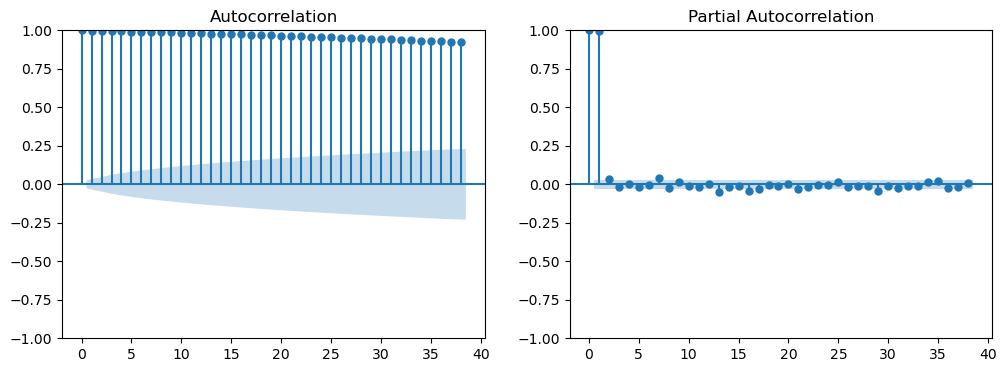

In [134]:
# 시각화 dubai
# subplot생성
fig, ax = plt.subplots(1,2 , figsize = (12,4))

# acf plot #자기상관성(자기상관함수) : 모두 양수
plot_acf(d2['Dubai'], ax = ax[0])

# pacf plot  부분자기상관성(부분자기상관계수)
plot_pacf(d2['Dubai'], ax= ax[1])
plt.show()

c:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



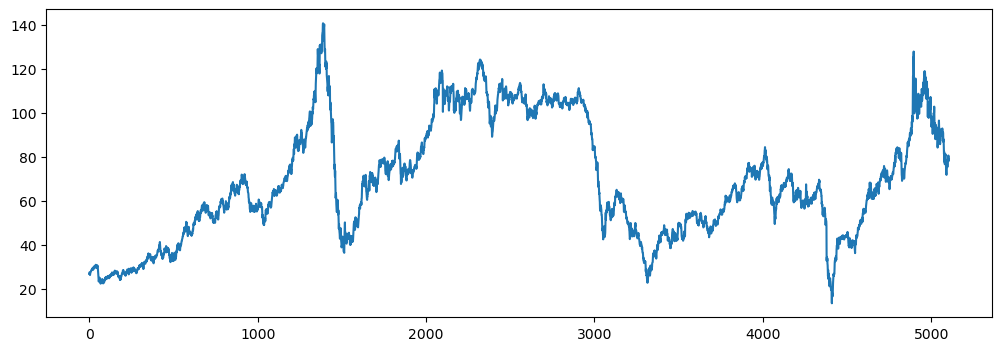

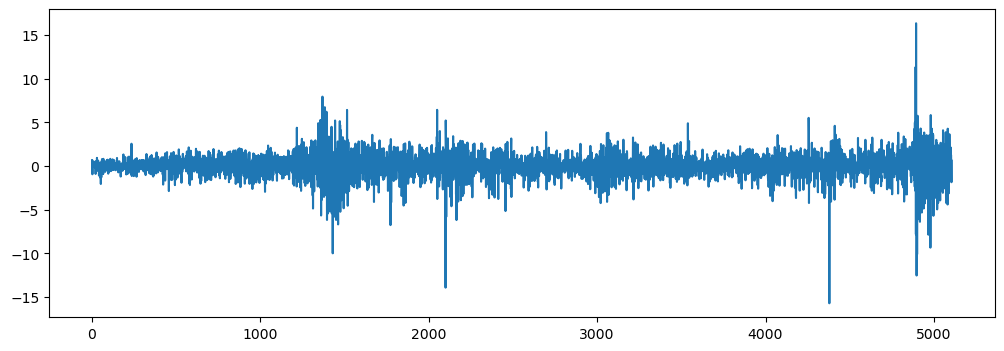

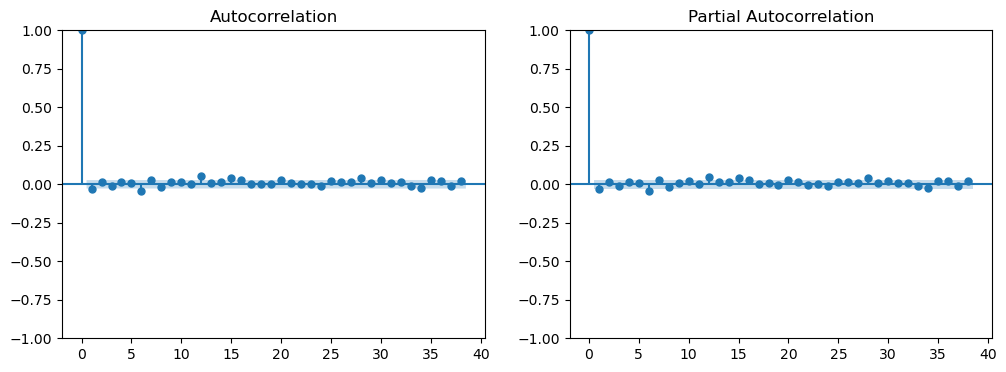

In [135]:
#1차 차분 dubai
plt.figure(figsize=(12.2,4))
plt.plot(d2.Dubai)

diff_1=d2['Dubai'].diff(periods=1).iloc[1:]
plt.figure(figsize=(12.2,4))
diff_1.plot()

fig, ax = plt.subplots(1,2 , figsize = (12,4))
plot_acf(diff_1, ax = ax[0])
plot_pacf(diff_1, ax= ax[1])

plt.show()

c:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



<Figure size 1220x400 with 0 Axes>

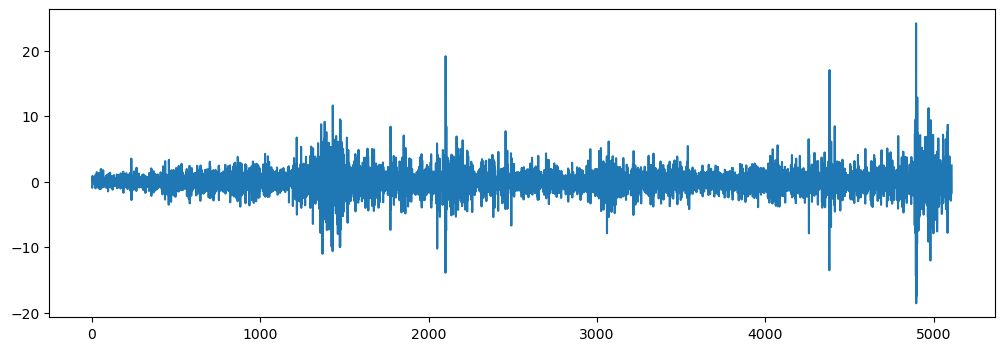

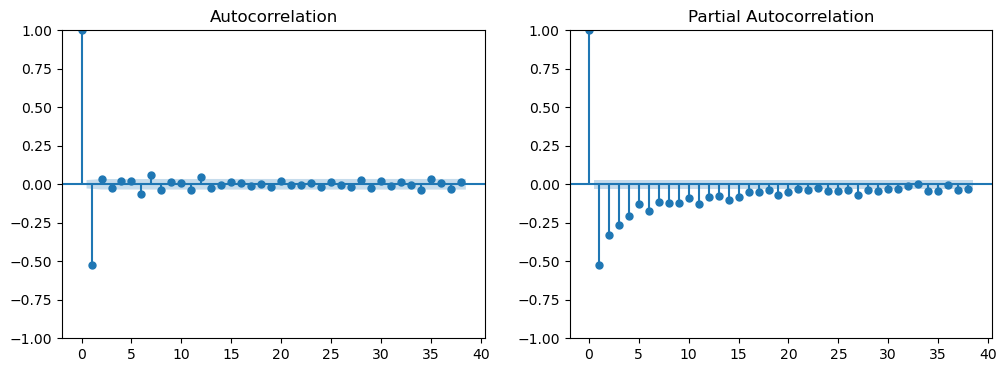

In [136]:
#2차 차분 dubai
plt.figure(figsize=(12.2,4))

diff_2=diff_1.diff(periods=1).iloc[1:]
plt.figure(figsize=(12.2,4))
diff_2.plot()

fig, ax = plt.subplots(1,2 , figsize = (12,4))
plot_acf(diff_2, ax = ax[0])
plot_pacf(diff_2, ax= ax[1])

plt.show()

In [137]:
import pmdarima as pm
model_dubai = pm.auto_arima(y = d2['Dubai']        # 데이터
                      , d = 2            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=21727.372, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=20098.827, Time=0.32 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.42 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=21725.372, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=19521.696, Time=0.40 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=19150.018, Time=0.58 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.13 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.81 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=19148.018, Time=0.30 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=19519.696, Time=0.21 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=3.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=2.04 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 21.507 seconds


In [138]:
print(model_dubai.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5106
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -9570.009
Date:                Wed, 19 Apr 2023   AIC                          19148.018
Time:                        10:32:23   BIC                          19174.169
Sample:                             0   HQIC                         19157.174
                               - 5106                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7813      0.006   -121.261      0.000      -0.794      -0.769
ar.L2         -0.5120      0.008    -60.648      0.000      -0.529      -0.495
ar.L3         -0.2657      0.006    -41.167      0.0

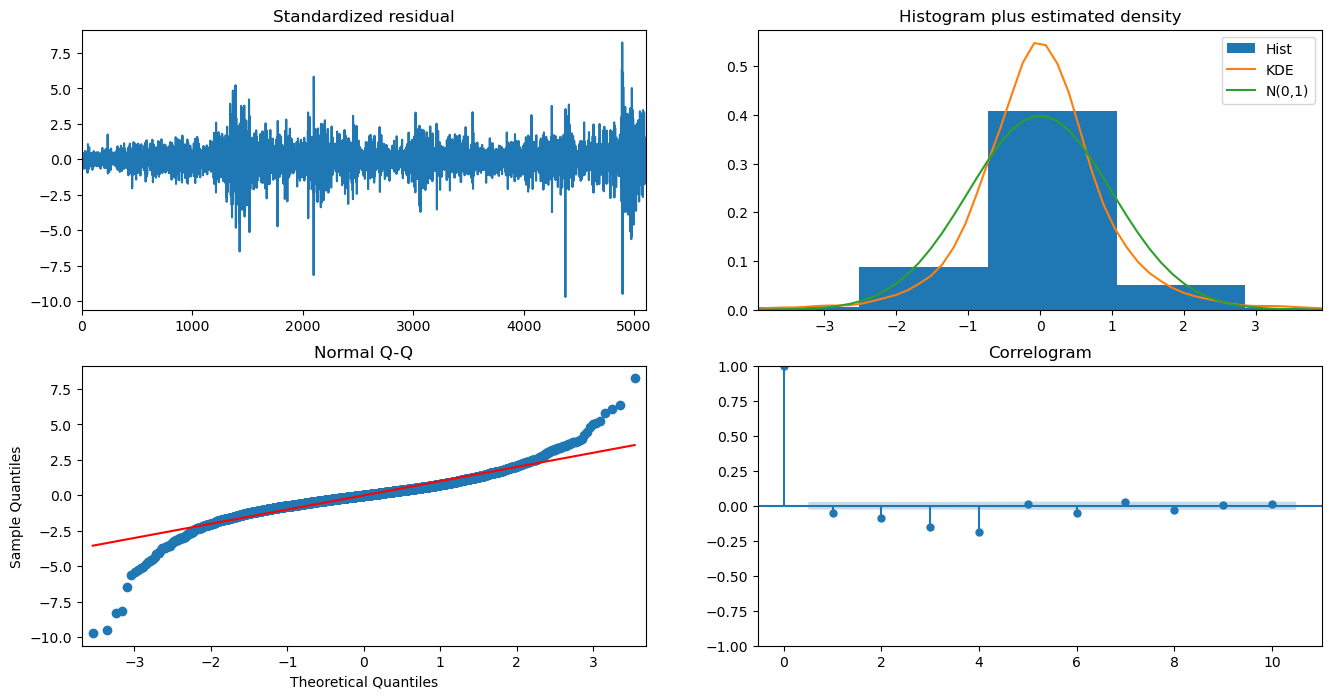

In [139]:
model_dubai.plot_diagnostics(figsize=(16, 8))
plt.show()

In [140]:
def forecast_one_step():
    fc, conf_int = model_dubai.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in future_real['Dubai']:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model_dubai.update(new_ob)

In [141]:
#그래프 확인 

from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = d2['Dubai'].index, y = d2['Dubai'], name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = test.index+5106, y = test['Dubai'], name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = test.index+5106, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
])
    
#     # 신뢰 구간---------------------------------------------------------
#     , go.Scatter(x = test.index.tolist() + y_test.index[::-1].tolist() 
#                 ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
#                 ,fill='toself'
#                 ,fillcolor='rgba(0,0,30,0.1)'
#                 ,line=dict(color='rgba(0,0,0,0)')
#                 ,hoverinfo="skip"
#                 ,showlegend=False)
# ])

fig.update_layout(height=400, width=1000, title_text="국제 유가 변동 그래프 _ Dubai _ ARIMA(3,2,0)모형")
fig.show()

In [42]:


from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # # # 훈련 데이터-------------------------------------------------------
    # # go.Scatter(x = d2['WTI'].index, y = d2['WTI'], name = "Train", mode = 'lines'
    # #           ,line=dict(color = 'royalblue'))

    # 예측값-----------------------------------------------------------
    go.Scatter(x = test.index+5106, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))

    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = test.index+5106, y = test['WTI'], name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
])

fig.update_layout(height=400, width=1000, title_text="ARIMA(3,2,0)모형")
fig.show()

In [149]:


from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # # # 훈련 데이터-------------------------------------------------------
    # # go.Scatter(x = d2['WTI'].index, y = d2['WTI'], name = "Train", mode = 'lines'
    # #           ,line=dict(color = 'royalblue'))

    # 예측값-----------------------------------------------------------
    go.Scatter(x = test.day, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))

    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = test.day, y = test['Dubai'], name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
])

fig.update_layout(height=500, width=1400, title_text="국제 유가 변동 그래프 _ Dubai _ ARIMA(3,2,0)모형")
fig.show()